# UNICEF MICS Survey data analysis

Understanding features that can predict why a caretaker might have a vaccination card using classification algorithms

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from  sklearn.preprocessing import  StandardScaler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.utils import resample
from sklearn.metrics import classification_report

Data collected at the children's level (MICS Under Five Children's questionnaire modules: Under-five child information panel, Child's age, Birth registration, Early childhood development, Breastfeeding , Care of illness, Immunization, Under-five child selected for blood test.)

Dataset produced by UNICEF and Central Statistics Organization

In [71]:
#importing ch.csv which was converted from .sav format in R. Check get_Congo_to_csv.R file
#Set low_memory = False to avoid the warning about column numbers having mixed type values.
## 100,104,106,114,115,116,117,118,120,122,123,125,126,127,131,133,134,136,152,153,168

ch_df = pd.read_csv('C:\Users\Varsha\Desktop\MSIM\Capstone\UNICEF---Analysis-and-Visualization-of-Immunization-Data\Pakistan data\ch_pak.csv',low_memory=False)

In [72]:
#Convert column with mixed types to object type.

ch_df.iloc[:,[100,104,106,114,115,116,117,118,120,122,123,125,126,127,131,133,134,136,152,153,168]] = ch_df.iloc[:,[100,104,106,114,115,116,117,118,120,122,123,125,126,127,131,133,134,136,152,153,168]].astype(object)
g = ch_df.columns.to_series().groupby(ch_df.dtypes).groups
g

{dtype('int64'): Index([u'HH1', u'HH2', u'LN', u'UF1', u'UF2', u'UF4', u'UF6', u'UF7', u'UF8D',
        u'UF8M', u'UF8Y', u'UF9', u'UF10', u'UF11', u'HH6', u'HH7', u'HL4',
        u'CDOI', u'melevel', u'division', u'windex5'],
       dtype='object'),
 dtype('float64'): Index([u'UF12H', u'UF12M', u'UF13H', u'UF13M', u'AG1D', u'AG1M', u'AG1Y',
        u'AG2', u'BR1', u'BR1A',
        ...
        u'CAGE', u'CAGE_6', u'CAGE_11', u'CAGED', u'chweight', u'wscore',
        u'wscoreu', u'windex5u', u'wscorer', u'windex5r'],
       dtype='object', length=226),
 dtype('O'): Index([u'EC7AA', u'EC7AB', u'EC7AX', u'EC7AY', u'EC7BA', u'EC7BB', u'EC7BX',
        u'EC7BY', u'EC7CA', u'EC7CB', u'EC7CX', u'EC7CY', u'EC7DA', u'EC7DB',
        u'EC7DX', u'EC7DY', u'EC7EA', u'EC7EB', u'EC7EX', u'EC7EY', u'EC7FA',
        u'EC7FB', u'EC7FX', u'EC7FY', u'IM3BD', u'IM3P0M', u'IM3P1D', u'IM3P3Y',
        u'IM3T1D', u'IM3T1M', u'IM3T1Y', u'IM3T2D', u'IM3T2Y', u'IM3T3M',
        u'IM3T3Y', u'IM3C1M', u'IM3C1Y', 

In [73]:
ch_df.describe()

,HH1,HH2,LN,UF1,UF2,UF4,UF6,UF7,UF8D,UF8M,...,CAGED,chweight,melevel,division,wscore,windex5,wscoreu,windex5u,wscorer,windex5r
count,18108.000000,18108.000000,18108.000000,18108.000000,18108.000000,18108.000000,18108.000000,18108.000000,18108.000000,18108.000000,...,16605.000000,18108.000000,18108.000000,18108.000000,18108.000000,18108.000000,7932.000000,7932.000000,11679.000000,11679.000000
mean,428.431964,10.352275,7.726198,428.431964,10.352275,7.726198,4.172134,46.795008,15.810747,4.124199,...,1006.465522,0.916998,1.843329,2.785785,-0.146187,2.204219,-0.147429,1.800933,0.004140,2.456375
std,269.415361,5.741518,4.224276,269.415361,5.741518,4.224276,3.794440,29.048289,8.558811,1.372228,...,1108.143834,0.847431,1.406195,1.308579,0.896322,1.371325,0.930452,1.501089,0.912139,1.595279
min,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,-1.777233,0.000000,-3.030231,0.000000,-1.493800,0.000000
25%,192.000000,5.000000,5.000000,192.000000,5.000000,5.000000,2.000000,20.000000,8.000000,3.000000,...,436.000000,0.414079,1.000000,2.000000,-0.931318,1.000000,-0.547089,1.000000,-0.684929,1.000000
50%,399.000000,10.000000,7.000000,399.000000,10.000000,7.000000,2.000000,44.000000,16.000000,4.000000,...,922.000000,0.688373,1.000000,3.000000,-0.168406,2.000000,0.000000,1.000000,-0.029224,2.000000
75%,653.000000,15.000000,9.000000,653.000000,15.000000,9.000000,5.000000,73.000000,23.000000,5.000000,...,1373.000000,1.125123,2.000000,4.000000,0.543420,3.000000,0.495220,3.000000,0.439809,4.000000
max,975.000000,20.000000,42.000000,975.000000,20.000000,42.000000,41.000000,99.000000,31.000000,8.000000,...,9999.000000,8.381366,9.000000,5.000000,2.438155,5.000000,1.781103,5.000000,4.279130,5.000000


In [74]:
columnNumbers = [x for x in range(ch_df.shape[1])]  # list of columns' integer indices

#columnNumbers.remove(0) #removing column integer index 0
ch_df = ch_df.iloc[:, columnNumbers] #return all columns except 0th column
ch_df.head()

,HH1,HH2,LN,UF1,UF2,UF4,UF6,UF7,UF8D,UF8M,...,CAGED,chweight,melevel,division,wscore,windex5,wscoreu,windex5u,wscorer,windex5r
0,1,2,7,1,2,7,2,16,21,4,...,1133.0,0.613236,1,1,-1.537632,1,-2.735402,1.0,NaN,NaN
1,1,3,9,1,3,9,2,16,21,4,...,1464.0,0.613236,1,1,-0.643725,2,-1.635452,1.0,NaN,NaN
2,1,4,4,1,4,4,2,17,21,4,...,1376.0,0.613236,1,1,-0.992865,1,-2.065068,1.0,NaN,NaN
3,1,4,5,1,4,5,2,17,21,4,...,310.0,0.613236,1,1,-0.992865,1,-2.065068,1.0,NaN,NaN
4,1,4,6,1,4,6,2,17,21,4,...,310.0,0.613236,1,1,-0.992865,1,-2.065068,1.0,NaN,NaN


In [75]:
wm_df = pd.read_csv('C:\Users\Varsha\Desktop\MSIM\Capstone\UNICEF---Analysis-and-Visualization-of-Immunization-Data\Pakistan data\wm_pak.csv')

In [76]:
wm_df.iloc[:,[53,81,102,103,105,121,128,129,146,149]] = wm_df.iloc[:,[53,81,102,103,105,121,128,129,146,149]].astype(object)
g = wm_df.columns.to_series().groupby(wm_df.dtypes).groups
g

{dtype('int64'): Index([u'HH1', u'HH2', u'LN', u'WM1', u'WM2', u'WM4', u'WM5', u'WM6D', u'WM6M',
        u'WM6Y', u'WM7', u'WM8', u'WM9', u'HH6', u'HH7', u'division',
        u'windex5'],
       dtype='object'),
 dtype('float64'): Index([u'WM10H', u'WM10M', u'WM11H', u'WM11M', u'WB1M', u'WB1Y', u'WB2',
        u'WB3', u'WB5', u'WB7',
        ...
        u'CEB', u'CSURV', u'CDEAD', u'wmweight', u'welevel', u'wscore',
        u'wscoreu', u'windex5u', u'wscorer', u'windex5r'],
       dtype='object', length=171),
 dtype('O'): Index([u'CM8', u'CM13', u'MN2A', u'MN2B', u'MN2C', u'MN2D', u'MN2F', u'MN2G',
        u'MN2H', u'MN2X',
        ...
        u'TA8E', u'TA8X', u'TA12A', u'TA12D', u'TA12E', u'TA12F', u'TA12G',
        u'TA12H', u'TA12I', u'TA12X'],
       dtype='object', length=114)}

In [77]:
columnNumbers = [x for x in range(wm_df.shape[1])]  # list of columns' integer indices

#columnNumbers.remove(0) #removing column integer index 0
wm_df = wm_df.iloc[:, columnNumbers] #return all columns except 0th column
wm_df.head()

,HH1,HH2,LN,WM1,WM2,WM4,WM5,WM6D,WM6M,WM6Y,...,CDEAD,wmweight,welevel,division,wscore,windex5,wscoreu,windex5u,wscorer,windex5r
0,1,1,7,1,1,7,17,21,4,2014,...,0.0,0.558521,1.0,1,0.330435,3,-0.436749,1.0,NaN,NaN
1,1,1,8,1,1,8,17,21,4,2014,...,0.0,0.558521,1.0,1,0.330435,3,-0.436749,1.0,NaN,NaN
2,1,1,9,1,1,9,17,21,4,2014,...,0.0,0.558521,1.0,1,0.330435,3,-0.436749,1.0,NaN,NaN
3,1,2,2,1,2,2,16,21,4,2014,...,0.0,0.558521,1.0,1,-1.537632,1,-2.735402,1.0,NaN,NaN
4,1,3,2,1,3,2,16,21,4,2014,...,4.0,0.558521,1.0,1,-0.643725,2,-1.635452,1.0,NaN,NaN


In [78]:
ch_wm_df = ch_df.merge(wm_df, on = ['HH1','HH2'],suffixes = ('', '_y'))
ch_wm_df= ch_wm_df[ch_wm_df.columns.drop(list(ch_wm_df.filter(regex='_y')))]

In [79]:
ch_wm_df.head()

,HH1,HH2,LN,UF1,UF2,UF4,UF6,UF7,UF8D,UF8M,...,WDOM,WAGEM,WDOBFC,WDOBLC,MSTATUS,CEB,CSURV,CDEAD,wmweight,welevel
0,1,2,7,1,2,7,2,16,21,4,...,1233.0,18.0,1286.0,1335.0,1.0,3.0,3.0,0.0,0.558521,1.0
1,1,3,9,1,3,9,2,16,21,4,...,1017.0,14.0,1083.0,1324.0,1.0,11.0,7.0,4.0,0.558521,1.0
2,1,3,9,1,3,9,2,16,21,4,...,NaN,NaN,NaN,NaN,3.0,0.0,0.0,0.0,0.558521,3.0
3,1,4,4,1,4,4,2,17,21,4,...,1202.0,14.0,1298.0,1362.0,1.0,5.0,5.0,0.0,0.558521,1.0
4,1,4,5,1,4,5,2,17,21,4,...,1202.0,14.0,1298.0,1362.0,1.0,5.0,5.0,0.0,0.558521,1.0


In [80]:
hh_df = pd.read_csv('C:\Users\Varsha\Desktop\MSIM\Capstone\UNICEF---Analysis-and-Visualization-of-Immunization-Data\Pakistan data\hh_pak.csv')

In [81]:
hh_df.iloc[:,[36,41]] = hh_df.iloc[:,[36,41]].astype(object)
g = hh_df.columns.to_series().groupby(hh_df.dtypes).groups
g

{dtype('int64'): Index([u'HH1', u'HH2', u'HH3', u'HH4', u'HH5D', u'HH5M', u'HH5Y', u'HH6',
        u'HH7', u'HH8A', u'HH8C', u'HH9', u'HH16', u'HH17', u'division',
        u'windex5', u'PSU', u'stratum'],
       dtype='object'),
 dtype('float64'): Index([u'HH10', u'HH11', u'HH12', u'HH13', u'HH14', u'HH15', u'HH15A',
        u'HH15B', u'HH18H', u'HH18M',
        ...
        u'ehweight', u'esweight', u'ceweight', u'saweight', u'helevel',
        u'wscore', u'wscoreu', u'windex5u', u'wscorer', u'windex5r'],
       dtype='object', length=214),
 dtype('O'): Index([u'CL5', u'CL7D', u'IR2A', u'IR2B', u'IR2C', u'IR2X', u'IR2Z', u'WS7A',
        u'WS7B', u'WS7C', u'WS7D', u'WS7E', u'WS7F', u'WS7G', u'WS7X', u'WS7Z',
        u'HW3BA', u'HW3BB', u'HW3BC', u'HW3BD', u'HW5BA', u'HW5BB', u'HW5BC',
        u'HW5BD', u'WQ10D', u'WQ12AD', u'WQ14D', u'WQ19D', u'WQ21BD', u'WQ23D',
        u'WQ26D', u'WQ29D'],
       dtype='object')}

In [82]:
columnNumbers = [x for x in range(hh_df.shape[1])]  # list of columns' integer indices

#columnNumbers.remove(0) #removing column integer index 0
hh_df = hh_df.iloc[:, columnNumbers] #return all columns except 0th column
hh_df.head()

,HH1,HH2,HH3,HH4,HH5D,HH5M,HH5Y,HH6,HH7,HH8A,...,division,helevel,wscore,windex5,wscoreu,windex5u,wscorer,windex5r,PSU,stratum
0,1,1,17,15,21,4,2014,1,1,2,...,1,2.0,0.330435,3,-0.436749,1.0,NaN,NaN,1,1
1,1,2,16,15,21,4,2014,1,1,2,...,1,1.0,-1.537632,1,-2.735402,1.0,NaN,NaN,1,1
2,1,3,16,15,21,4,2014,1,1,1,...,1,2.0,-0.643725,2,-1.635452,1.0,NaN,NaN,1,1
3,1,4,17,15,21,4,2014,1,1,2,...,1,1.0,-0.992865,1,-2.065068,1.0,NaN,NaN,1,1
4,1,5,17,15,21,4,2014,1,1,2,...,1,1.0,-1.004787,1,-2.079738,1.0,NaN,NaN,1,1


In [83]:
df = ch_wm_df.merge(hh_df, on = ['HH1','HH2'],suffixes = ('', '_y'))
df = df[df.columns.drop(list(df.filter(regex='_y')))]

In [84]:
df.head()

,HH1,HH2,LN,UF1,UF2,UF4,UF6,UF7,UF8D,UF8M,...,SS7,HHSEX,hhweight,ehweight,esweight,ceweight,saweight,helevel,PSU,stratum
0,1,2,7,1,2,7,2,16,21,4,...,NaN,1.0,0.547422,0.505467,0.496271,0.504924,0.507079,1.0,1,1
1,1,3,9,1,3,9,2,16,21,4,...,1.0,1.0,0.547422,0.505467,0.496271,0.504924,0.507079,2.0,1,1
2,1,3,9,1,3,9,2,16,21,4,...,1.0,1.0,0.547422,0.505467,0.496271,0.504924,0.507079,2.0,1,1
3,1,4,4,1,4,4,2,17,21,4,...,NaN,1.0,0.547422,0.505467,0.496271,0.504924,0.507079,1.0,1,1
4,1,4,5,1,4,5,2,17,21,4,...,NaN,1.0,0.547422,0.505467,0.496271,0.504924,0.507079,1.0,1,1


Remove ID columns

In [85]:
df = df.loc[:, ~df.columns.str.startswith('UF')]
df = df.loc[:, ~df.columns.str.startswith('HH')]
df = df.loc[:, ~df.columns.str.startswith('LN')]
df.drop('AN1', axis=1, inplace=True)

In [86]:
df['IM1'].unique()

array([ nan,   3.,   1.,   2.,   9.])

In [87]:
#Set the target to column IM1 - Has the card and the card is seen
#Seperate the target column from the df.

df['has_card'] = np.where(df['IM1'] == 1, 1,0)

In [88]:
df = df.loc[:, ~df.columns.str.startswith('IM')]

In [89]:
df = df.fillna(0)
target = df['has_card']
target.unique()

array([0, 1], dtype=int64)

In [90]:
#Creating a binary variable since by coding Yes to 1 and any other response as 0.

y=['has_card']
df_vars =df.columns.values.tolist()
X=[i for i in df_vars]
X_train, X_test, y_train, y_test = train_test_split(df[X],df[y].values.ravel(), test_size=0.3, random_state=0)

# Handling data imbalance by downsampling the majority class

In [91]:
df_majority = X_train[X_train.has_card == 0]
df_minority = X_train[X_train.has_card == 1]

print(len(df_majority))
print(len(df_minority))

min_class_len = len(df_minority)

22492
4426


In [92]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace= True,     # sample with replacement
                                 n_samples=min_class_len,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with downsampled minority class
df_downsampled = pd.concat([df_minority, df_majority_downsampled])
 
# Display new class counts
df_downsampled.has_card.value_counts()

1    4426
0    4426
Name: has_card, dtype: int64

In [93]:
X_train = df_downsampled
len(X_train)
y_train = df.iloc[X_train.index.tolist(),:]
y_train = y_train['has_card']
X_train = X_train[X_train.columns.drop(list(X_train.filter(regex='has_card')))]

In [94]:
#One hot encoding of categorical values using get_dummies function

X_train = pd.get_dummies(X_train)
X_train.head()

,AG1D,AG1M,AG1Y,AG2,BR1,BR1A,BR2,BR3,BR4,EC1,...,WQ19D_0,WQ19D_DS,WQ21BD_0,WQ21BD_B,WQ23D_0,WQ23D_H,WQ26D_0,WQ26D_S,WQ29D_0,WQ29D_B
38281,30.0,5.0,2012.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
27806,29.0,8.0,2013.0,0.0,3.0,0.0,2.0,2.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
35328,6.0,11.0,2013.0,0.0,3.0,0.0,2.0,1.0,96.0,0.0,...,0,1,0,1,0,1,0,1,0,1
33779,13.0,11.0,2011.0,2.0,3.0,0.0,2.0,2.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
36737,18.0,7.0,2013.0,0.0,1.0,2.0,2.0,2.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0


In [95]:
X_test = pd.get_dummies(X_test)
X_test.head()

,AG1D,AG1M,AG1Y,AG2,BR1,BR1A,BR2,BR3,BR4,EC1,...,WQ19D_0,WQ19D_DS,WQ21BD_0,WQ21BD_B,WQ23D_0,WQ23D_H,WQ26D_0,WQ26D_S,WQ29D_0,WQ29D_B
16748,30.0,11.0,2010.0,3.0,3.0,0.0,2.0,2.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
24199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,1,0,1,1,0
24484,5.0,11.0,2011.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
38076,98.0,1.0,2010.0,4.0,3.0,0.0,2.0,2.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
14618,98.0,6.0,2009.0,4.0,3.0,0.0,8.0,2.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0


In [96]:
# Get missing columns in the training test
missing_cols = set( X_train.columns ) - set( X_test.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    X_test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
X_test = X_test[X_train.columns]
X_test.head()

,AG1D,AG1M,AG1Y,AG2,BR1,BR1A,BR2,BR3,BR4,EC1,...,WQ19D_0,WQ19D_DS,WQ21BD_0,WQ21BD_B,WQ23D_0,WQ23D_H,WQ26D_0,WQ26D_S,WQ29D_0,WQ29D_B
16748,30.0,11.0,2010.0,3.0,3.0,0.0,2.0,2.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
24199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,0,1,0,1,1,0
24484,5.0,11.0,2011.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
38076,98.0,1.0,2010.0,4.0,3.0,0.0,2.0,2.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
14618,98.0,6.0,2009.0,4.0,3.0,0.0,8.0,2.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0


# Logistic Regression Classifier

In [97]:
#Training the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [98]:
feature_importance = abs(logreg.coef_[0])
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

In [99]:
feature_imp_data = list(zip(X_train, feature_importance))
feature_imp_data.sort(key=lambda x: x[1], reverse=True) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
people = list(zip(*feature_imp_data))[0]
score = list(zip(*feature_imp_data))[1]

In [100]:
people = people[0:50]
score = score[0:50]
x_pos = np.arange(len(people)) 

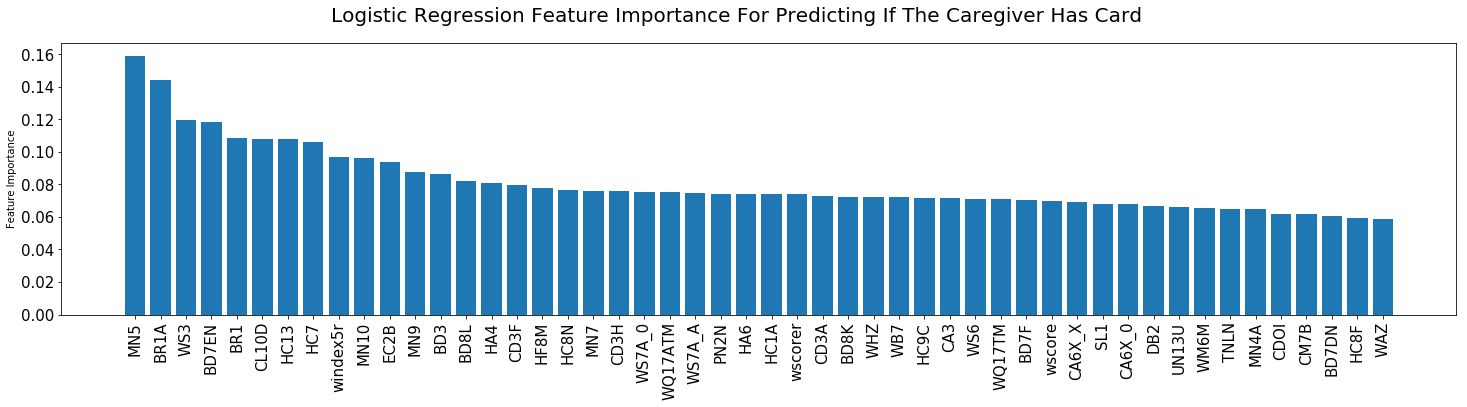

In [101]:
# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, score, 1)
trendline = intercept + (slope * x_pos)
plt.figure(figsize=(25,5))
plt.bar(x_pos, score,align='center')
plt.xticks(x_pos, people) 
plt.ylabel('Feature Importance')
plt.suptitle('Logistic Regression Feature Importance For Predicting If The Caregiver Has Card', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.xticks(rotation=90)
plt.show()

In [102]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


In [103]:
#Overall classification report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      0.81      0.89      9665
          1       0.48      0.88      0.62      1872

avg / total       0.89      0.82      0.84     11537



In [104]:
# Read the Labels File into a df
labels_df = pd.read_csv('C:\Users\Varsha\Desktop\MSIM\Capstone\UNICEF---Analysis-and-Visualization-of-Immunization-Data\Pakistan data\label_pak.csv',low_memory=False)
labels_df.head()

,name,label
0,HH1,Cluster number
1,HH2,Household number
2,LN,Line number
3,UF1,Cluster number
4,UF2,Household number


In [105]:
# Create a df with just the top 50 features
features_df = pd.DataFrame(feature_imp_data[0:50], columns=['name','Score'])
features_df

,name,Score
0,MN5,0.159065
1,BR1A,0.143880
2,WS3,0.119693
3,BD7EN,0.118332
4,BR1,0.108541
5,CL10D,0.107890
6,HC13,0.107782
7,HC7,0.105855
8,windex5r,0.096937
9,MN10,0.096021


In [106]:
# Merge the feature file with the label file so that it can be used with an external dashboard
final_df = pd.merge(features_df,labels_df,on='name',how='left')
final_df.to_csv("Features_LR_Pak.csv", encoding='utf-8')
final_df.drop_duplicates(inplace= True)
final_df = final_df.reset_index(drop = True)
final_df

,name,Score,label
0,MN5,0.159065,NaN
1,BR1A,0.143880,Is the birth certificate issued by local gover...
2,WS3,0.119693,Location of the water source
3,BD7EN,0.118332,Times child drank infant formula
4,BR1,0.108541,Birth certificate
5,CL10D,0.107890,Household chores: washing clothes
6,HC13,0.107782,Household own any animals
7,HC7,0.105855,Cooking location
8,windex5r,0.096937,Rural wealth index quintile
9,MN10,0.096021,NaN


# Random Forest Classifier

Random Forests is an ensemble model which uses a large number of strong decision trees through bagging.
Each decision tree is built on a subset of features and a subset of rows from the data.
The model combines all of them in order to smooth out their predictions

In [107]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
rfc = RandomForestClassifier()

# Train the Classifier to take the training features and learn how they relate
# to the training y 
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [108]:
y_pred = rfc.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.86


In [109]:
#Overall classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.98      0.85      0.91      9665
          1       0.55      0.91      0.68      1872

avg / total       0.91      0.86      0.88     11537



Let's validate the results of Random Forests Model with kfold cross validation

In [110]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results = model_selection.cross_val_score(rfc, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.867


In [111]:
feature_imp_data = list(zip(X_train, rfc.feature_importances_))

In [112]:
feature_imp_data.sort(key=lambda x: x[1], reverse=True) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
people = list(zip(*feature_imp_data))[0]
score = list(zip(*feature_imp_data))[1]

In [113]:
people = people[0:50]
score = score[0:50]
x_pos = np.arange(len(people)) 
print feature_imp_data[0:50]

[('BD8C', 0.062691924338769259), ('HF8M', 0.040124453636517135), ('HF13P0D', 0.038752896952698165), ('BD8M', 0.037932371092568876), ('BD8B', 0.037052089049874858), ('BD8N', 0.036453932868191305), ('EC12', 0.02773623954465157), ('BD6', 0.023188939141739473), ('HF13T1M', 0.019193107955308045), ('HF13T1Y', 0.017739988184083483), ('EC10', 0.016620438110210897), ('CAGE_6', 0.016285088950557969), ('AG1D', 0.012281560485928343), ('HA8C', 0.01050728287020475), ('WHP', 0.010112629739405098), ('WS8', 0.0088418769381935908), ('HF9Y', 0.0081936592698616389), ('HF13BY', 0.008034232624695126), ('HF9D', 0.0077635049155185655), ('HA1', 0.0076792542423930864), ('CAGE', 0.007583525385267703), ('HF12D', 0.0068397651863724472), ('HF12Y', 0.0067866996312705898), ('windex5', 0.0064326390440411219), ('PSU', 0.0059175450516059597), ('AN2', 0.0057546064406270884), ('HF12M', 0.0056587585429035735), ('SL1', 0.005463444931122094), ('CDOB', 0.005373572572928159), ('CAGED', 0.0050976218694387728), ('HF7', 0.0050800

In [114]:
# Read the Labels File into a df
labels_df = pd.read_csv('C:\Users\Varsha\Desktop\MSIM\Capstone\UNICEF---Analysis-and-Visualization-of-Immunization-Data\Pakistan data\label_pak.csv',low_memory=False)
labels_df.head()

,name,label
0,HH1,Cluster number
1,HH2,Household number
2,LN,Line number
3,UF1,Cluster number
4,UF2,Household number


In [115]:
# Create a df with just the top 50 features
features_df = pd.DataFrame(feature_imp_data[0:50], columns=['name','Score'])
features_df.head()

,name,Score
0,BD8C,0.062692
1,HF8M,0.040124
2,HF13P0D,0.038753
3,BD8M,0.037932
4,BD8B,0.037052


In [116]:
# Merge the feature file with the label file so that it can be used with an external dashboard
final_df = pd.merge(features_df,labels_df[['name','label']],on='name', how='left')
final_df.to_csv("Features_RF_Pak.csv", encoding='utf-8', index=False)
final_df.head()

,name,Score,label
0,BD8C,0.062692,Child ate foods made from grains
1,HF8M,0.040124,Month of interview
2,HF13P0D,0.038753,Day of Polio at birth immunization
3,BD8M,0.037932,"Child ate beans, lentils or nuts"
4,BD8B,0.037052,Child ate fortified baby food (cerelac etc.)


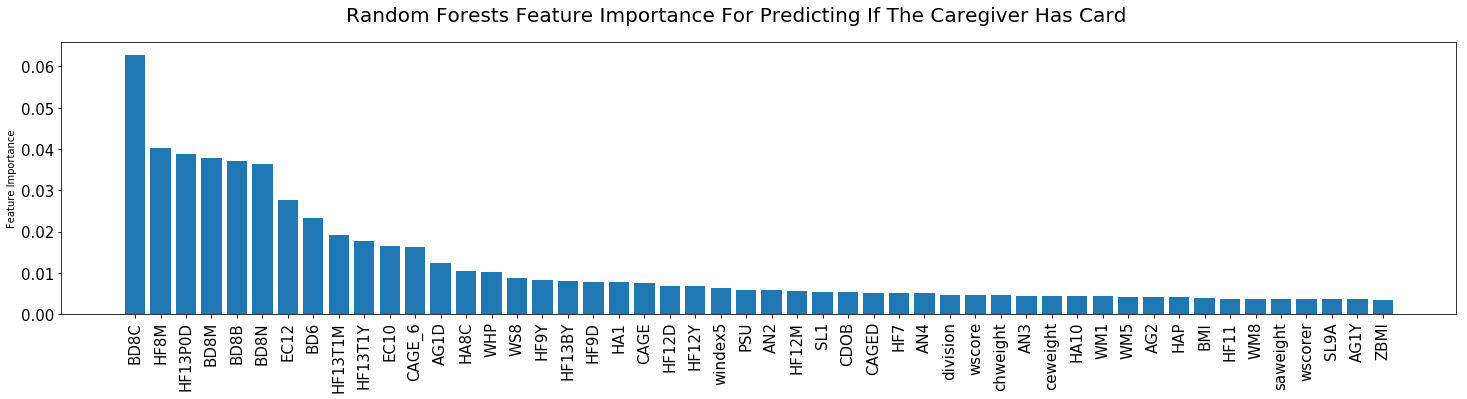

In [117]:
# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, score, 1)
trendline = intercept + (slope * x_pos)
plt.figure(figsize=(25,5))
plt.bar(x_pos, score,align='center')
plt.xticks(x_pos, people) 
plt.ylabel('Feature Importance')
plt.suptitle('Random Forests Feature Importance For Predicting If The Caregiver Has Card', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.xticks(rotation=90)
plt.show()

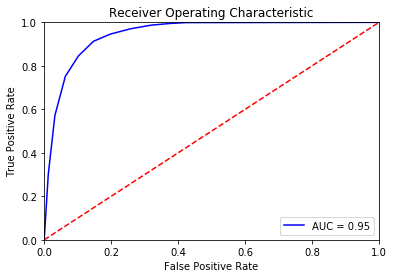

In [118]:
# calculate the fpr and tpr for all thresholds of the classification
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Gradient Boosting Decision Tree Classifier

Gradient Boosting Decision Trees is an ensemble model which uses a sequence of weak constrained decision trees through boosting.
Each tree is allowed a maximum depth and hence tuned and each tree tries to correct the predictions of the trees before it.

In [119]:
gbd = GradientBoostingClassifier()
gbd = gbd.fit(X_train, y_train)

In [120]:
y_pred = gbd.predict(X_test)
print('Accuracy of gradient boosting decision tree classifier on test set: {:.2f}'.format(gbd.score(X_test, y_test)))

Accuracy of gradient boosting decision tree classifier on test set: 0.84


In [121]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results = model_selection.cross_val_score(gbd, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.840


In [122]:
feature_imp_data = list(zip(X_train, gbd.feature_importances_))

In [123]:
feature_imp_data.sort(key=lambda x: x[1], reverse=True) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
people = list(zip(*feature_imp_data))[0]
score = list(zip(*feature_imp_data))[1]

In [124]:
people = people[0:50]
score = score[0:50]
x_pos = np.arange(len(people)) 

In [125]:
#Overall classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.98      0.82      0.89      9665
          1       0.50      0.90      0.64      1872

avg / total       0.90      0.84      0.85     11537



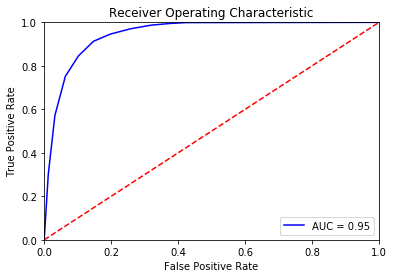

In [126]:
# calculate the fpr and tpr for all thresholds of the classification
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

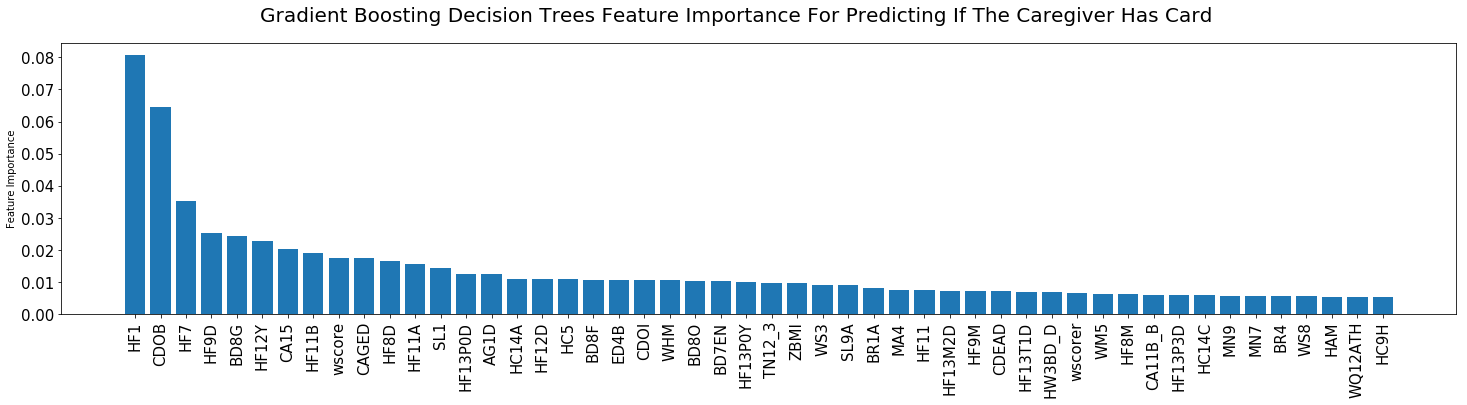

In [127]:
# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, score, 1)
trendline = intercept + (slope * x_pos)
plt.figure(figsize=(25,5))
plt.bar(x_pos, score,align='center')
plt.xticks(x_pos, people) 
plt.ylabel('Feature Importance')
plt.suptitle('Gradient Boosting Decision Trees Feature Importance For Predicting If The Caregiver Has Card', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.xticks(rotation=90)
plt.show()

In [128]:
# Create a df with just the top 50 features
features_df = pd.DataFrame(feature_imp_data[0:50], columns=['name','Score'])
features_df

,name,Score
0,HF1,0.080561
1,CDOB,0.064560
2,HF7,0.035404
3,HF9D,0.025290
4,BD8G,0.024223
5,HF12Y,0.022842
6,CA15,0.020355
7,HF11B,0.019075
8,wscore,0.017555
9,CAGED,0.017481


In [129]:
# Merge the feature file with the label file so that it can be used with an external dashboard
final_df = pd.merge(features_df,labels_df[['name','label']],on='name', how='left')
final_df = final_df.drop_duplicates()
final_df.to_csv("Features_GB_Pak.csv", encoding='utf-8', index=False)
final_df

,name,Score,label
0,HF1,0.080561,Cluster number
1,CDOB,0.064560,Date of birth of child (CMC)
2,HF7,0.035404,Interviewer number
3,HF9D,0.025290,Day of birth
4,BD8G,0.024223,"Child ate ripe mangoes, papayas"
5,HF12Y,0.022842,Year of birth as written on vaccination record
6,CA15,0.020355,What was done to dispose of the stools
7,HF11B,0.019075,Main data entry clerk number
8,wscore,0.017555,Combined wealth score
11,CAGED,0.017481,Age in days


In [130]:
print(final_df.head())
nan_df = final_df[final_df.label.isnull()]
len(nan_df)

   name     Score                            label
0   HF1  0.080561                   Cluster number
1  CDOB  0.064560     Date of birth of child (CMC)
2   HF7  0.035404               Interviewer number
3  HF9D  0.025290                     Day of birth
4  BD8G  0.024223  Child ate ripe mangoes, papayas


7

In [131]:
f_name_lst = list(nan_df.name)
final_df = final_df[~final_df['name'].isin(f_name_lst)]
final_df.sort_values('Score')

,name,Score,label
61,HC9H,0.005246,Tractor / agricultural machinery
59,WQ12ATH,0.005350,Time of duplicate water sample : Hours
58,HAM,0.005526,Height for age percent of reference median NCHS
56,WS8,0.005555,Type of toilet facility
55,BR4,0.005705,Main reason Child's Birth not registered with ...
51,HC14C,0.005860,Goats
50,HF13P3D,0.005982,Day of Polio3 immunization
48,HF8M,0.006415,Month of interview
44,wscorer,0.006540,Rural wealth score
42,HF13T1D,0.007066,Day of Pentavalent 1st Dose


In [132]:
selected_features = list(final_df.name)
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [133]:
#Training the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [134]:
X_test = pd.get_dummies(X_test)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


In [135]:
feature_importance = (logreg.coef_[0])
feature_importance = (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

In [136]:
col_list = list(X_train.columns[sorted_idx])
label_list = []
for i in col_list:
    label_row = final_df[final_df['name'] == i]
    label_list.append(list(label_row.label))

label_list = [''.join(x) for x in label_list]
print(label_list)

['Day of birth of child', 'Month of interview', 'Total children aged 1-17 years', 'Rank number of the selected child', 'Date of interview child (CMC)', 'Goats', 'Day of Measles 2', 'Cattle, milk cows, buffaloes or bulls', 'What was done to dispose of the stools', 'Day of Polio3 immunization', 'Type of toilet facility', 'Day of interview', 'Day of birth as written on vaccination record', 'Weight for height percent of reference median NCHS', 'Age in days', 'Year of birth as written on vaccination record', 'Year of Polio at birth immunization', 'Height for age percent of reference median NCHS', 'Cluster number', 'Main material of exterior wall', 'Interviewer number', 'Body Mass Index z-score WHO', 'Field editor', 'Person 3 who slept under net', "Main reason Child's Birth not registered with Local Government Department (UC)", 'Day of Pentavalent 1st Dose', 'Day of Polio at birth immunization', 'Highest grade completed at that level', 'Result of health facility visit', 'Month of birth', 'Da

In [137]:
result_df = pd.DataFrame({'Feature': label_list ,'Coefficient': feature_importance[sorted_idx],'Column' :col_list})
result_df.head()

,Coefficient,Column,Feature
0,-0.722995,AG1D,Day of birth of child
1,-0.207479,HF8M,Month of interview
2,-0.106293,SL1,Total children aged 1-17 years
3,-0.101110,SL9A,Rank number of the selected child
4,-0.080761,CDOI,Date of interview child (CMC)


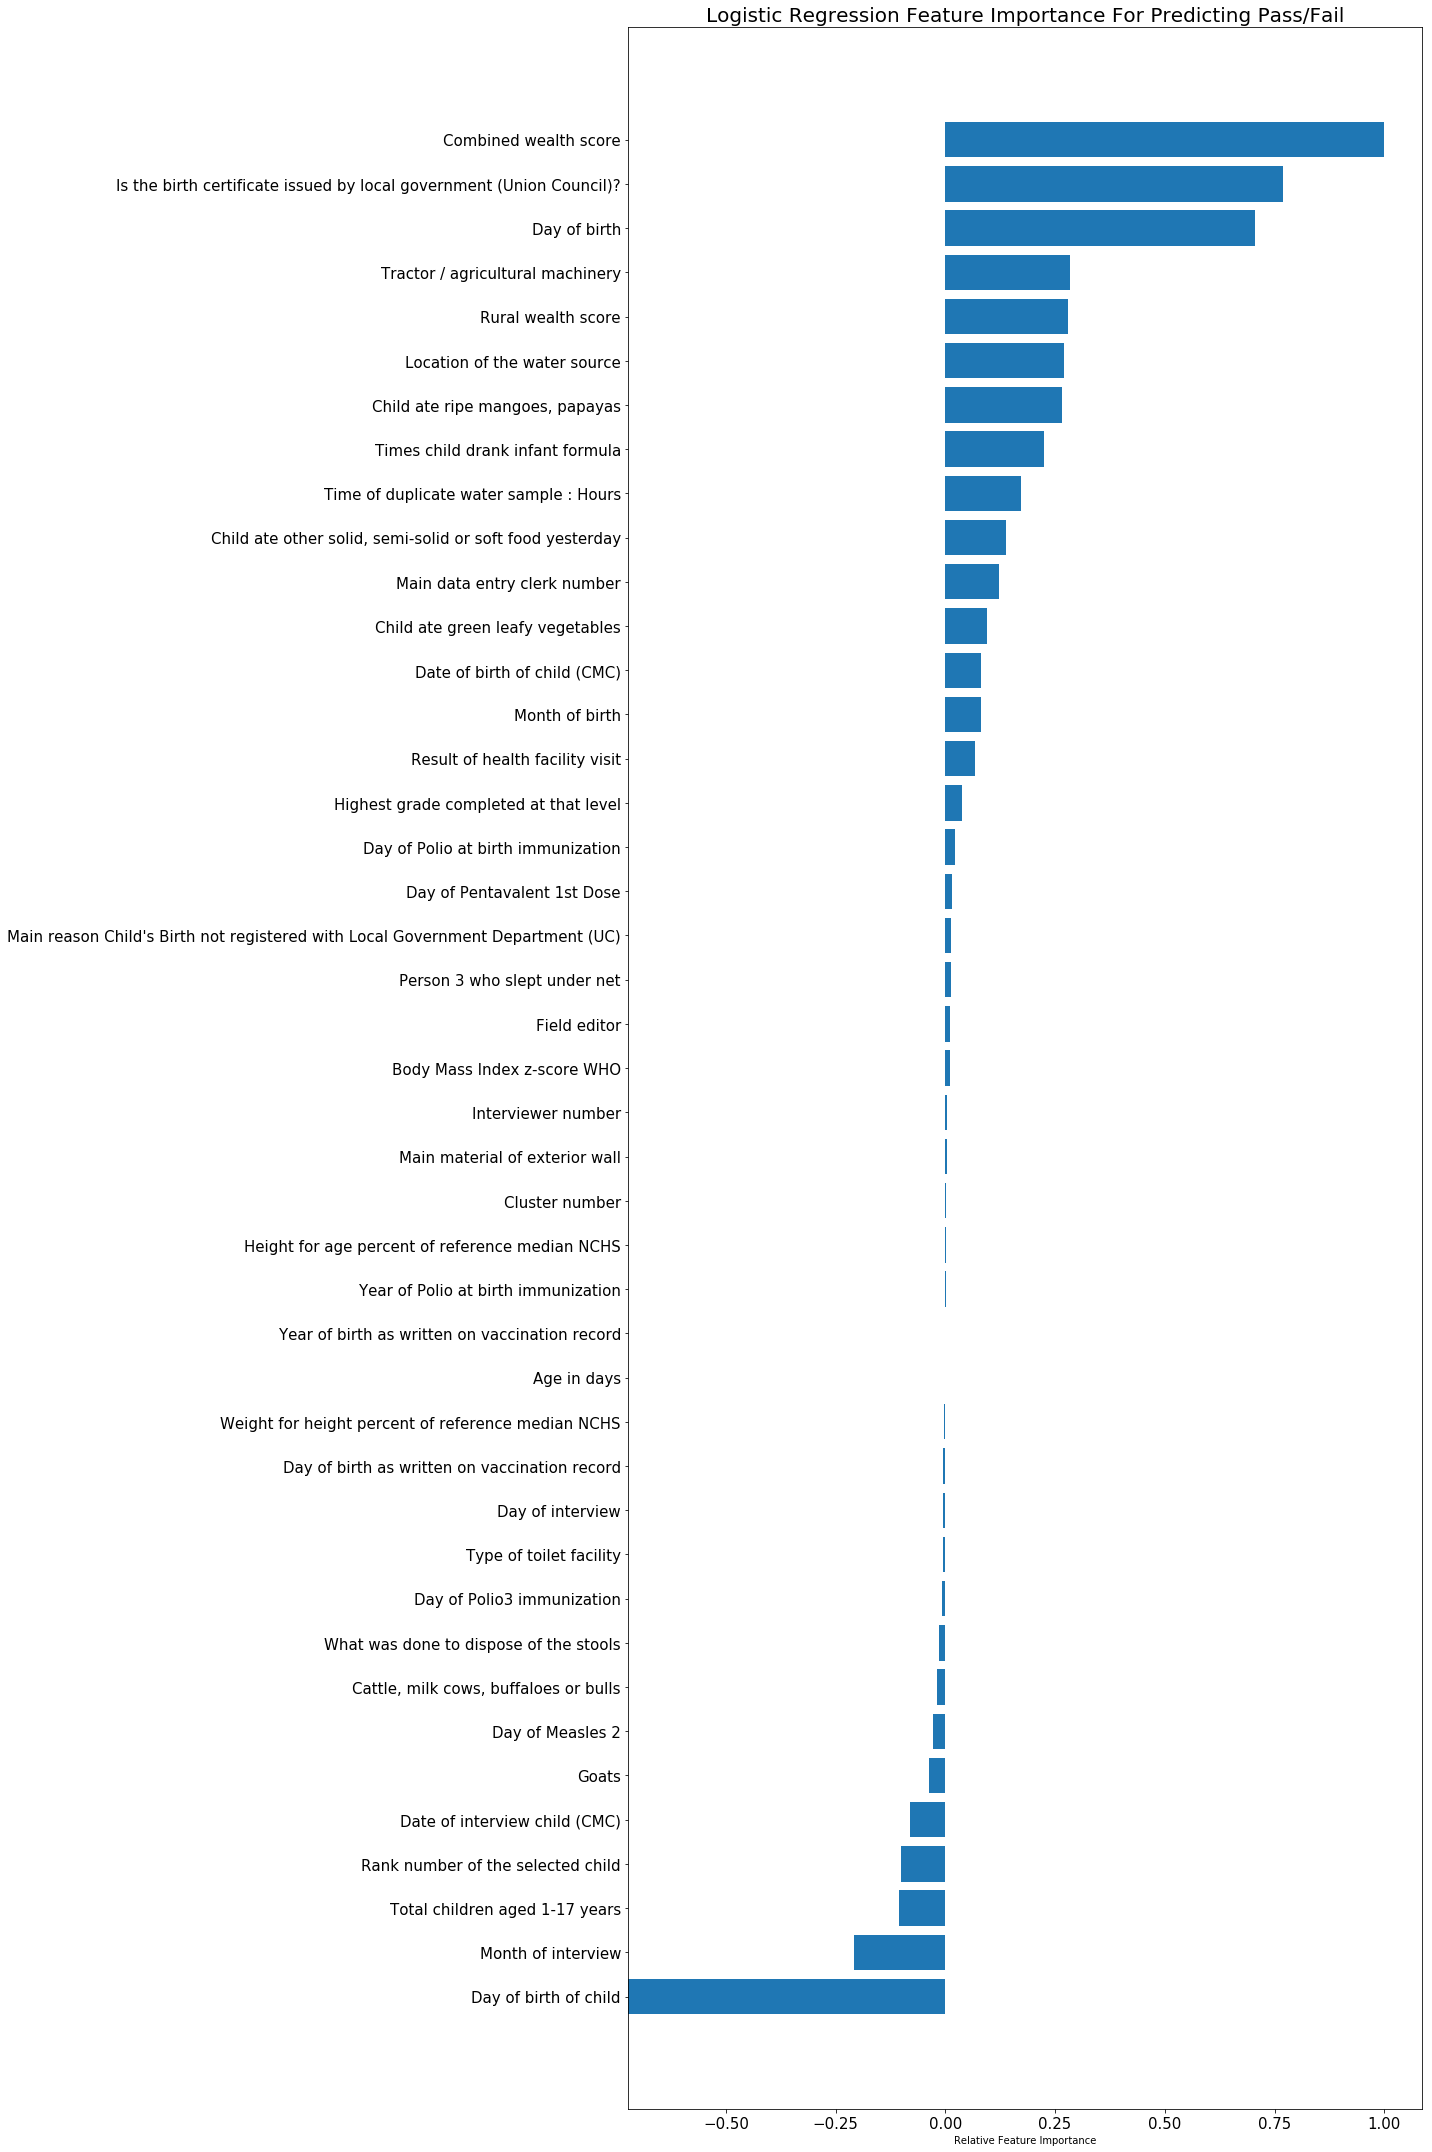

In [138]:
result_df.to_csv('result_Pakistan.csv')
featfig = plt.figure(figsize=(20,30))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(label_list, fontsize=8)
featax.set_xlabel('Relative Feature Importance')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.title('Logistic Regression Feature Importance For Predicting Pass/Fail', fontsize=20)
plt.tight_layout()   
plt.show()